# Data Analysis on tmdb-movies.csv dataset

Import necessary modules to perform data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load data from CSVs using pandas

In [2]:
#Dataset is downloaded in same folder
imdb = pd.read_csv('tmdb-movies.csv')

Questions: 

I will focus on these questions along with necessary data cleaning and wrangling needed

1) How has average revenue changed over years?

2) Which movie has the highest earning?

3) Correlation between vote_average and earnings?

4) Is there corelation between popularity and revenues?

5) Does More budget affect earnings?

6) Which genres bring the most earning and revenues?

7) Can we provide a list of the most popular directors based on ratings?



In [3]:
imdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [4]:
imdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Describe function gives a basic overview of numeric data. It gives some interesting insights as well.

Maximum runtime for at least 1 movie is 900 mins (15 hours). I would like to know this movie name.
Highest vote_average for any movie is 9.2.
There are 10866 movie data available. Numeric data is available for all movies. 
min value for some parameters like budget, revenue, runtime, budget_adj, revenue_adj is 0. This doesn't make sense suggesting these values to be incomplete. I will try to identify such cases.

In [5]:
imdb.iloc[imdb['vote_average'].idxmax(),:]

id                                                                 125336
imdb_id                                                         tt2044056
popularity                                                       0.006925
budget                                                                  0
revenue                                                                 0
original_title                              The Story of Film: An Odyssey
cast                    Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...
homepage                http://www.channel4.com/programmes/the-story-o...
director                                                     Mark Cousins
tagline                                                               NaN
keywords                cinema|nouvelle vague|hindi cinema|cinema novo...
overview                The Story of Film: An Odyssey, written and dir...
runtime                                                               900
genres                                

In [6]:
#The story of Film: An Odyssey has the maximum vote_average of 9.2. It is a documetary directed by Mark Cousins
print ('{} has the maximum vote_average of {}'.format(imdb.iloc[imdb['vote_average'].idxmax(),:]['original_title'],imdb.iloc[imdb['vote_average'].idxmax(),:]['vote_average']))
print ('Runtime for this movie: {}mins'.format(imdb.iloc[imdb['vote_average'].idxmax(),:]['runtime']))

The Story of Film: An Odyssey has the maximum vote_average of 9.2
Runtime for this movie: 900mins


#The story of Film: An Odyssey has the maximum vote_average of 9.2. It is a documetary directed by Mark Cousins
#This documetry is of 15 hours runtime

In [7]:
#Calculating budget or revenue data from dataset corresponding to 0 value
x=(imdb['budget']==0).sum()
print ('Number of movies whose budget data is missing: {}'.format(x))
y=(imdb['revenue']==0).sum()
print ('Number of movies whose revenue data is missing: {}'.format(y))
print ((imdb['budget_adj']==0).sum())
print ((imdb['revenue_adj']==0).sum())
z=((imdb['budget']==0)&(imdb['revenue']==0)).sum()
print ('Number of movies whose revenue as well as budget data is missing: {}'.format(z))
w=((imdb['budget']==0)|(imdb['revenue']==0)).sum()
print ('Number of movies whose either revenue or budget data is missing: {}'.format(w))

Number of movies whose budget data is missing: 5696
Number of movies whose revenue data is missing: 6016
5696
6016
Number of movies whose revenue as well as budget data is missing: 4701
Number of movies whose either revenue or budget data is missing: 7011


There are significant number of movies with 0 budget or revenue data. These data appears to be missing and replaced by 0 in dataset. I will not consider such data for revenue studies. However, other information like vote_average is present as its minimum is not zero. So, data corresponding to zero budget or revenue is still useful for other information.  

In [8]:
#New Dataframe with non-zero budget and revenue
imdb1=imdb[(imdb['budget']!=0)&(imdb['revenue']!=0)]

In [9]:
imdb1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
imdb1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
imdb.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Some information for a few movies are missing. However, all of them are non-numeric information. For this study, we are not skipping data corresponding to some NAN values as numeric information are at least available and could be useful. 

# 1) How has average revenue changed over years?

In [12]:
yearly_revenue=imdb1.groupby('release_year')['revenue'].mean() # Grouping movies based on release_year information

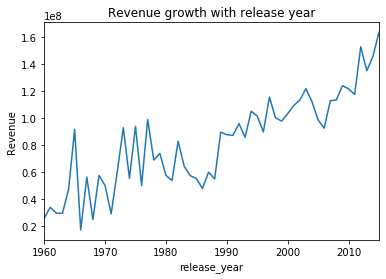

In [20]:
ax=yearly_revenue.plot(title='Revenue growth with release year')
ax.set_ylabel('Revenue')
plt.show()

In [21]:
print (yearly_revenue.idxmax())
print (yearly_revenue.max())

2015
163768267.50625


In [22]:
yearly_revenue.idxmin()

1966

Average revenue from movies have increased over time. This is in line with expectation as higher revenue is expected with rise in inflection. Highest average revenue of 1.637E08 was collected in 2015 and lowest in 1966.

# 2) Which movie has the highest earning?

I will use budjet_adj and revenue_adj data to calculate earnings for each movies and create a new column in dataframe. I will  create another column to see earnings in percentage of budget_adj

In [23]:
imdb1=imdb1.reset_index()
imdb1['earning']=imdb1['revenue_adj']-imdb1['budget_adj']

In [24]:
imdb1.loc[:,'earning_percentage']=imdb1.loc[:,'earning']/imdb1.loc[:,'budget_adj']*100

In [25]:
imdb1.head()

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,earning,earning_percentage
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,909.019207
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,152.290903
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,168.398365
3,3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,...,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,934.089113
4,4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,...,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,692.762821


In [26]:
#Movie with highest earning and its details
imdb1.iloc[imdb1['earning'].idxmax(),:]

index                                                                1329
id                                                                     11
imdb_id                                                         tt0076759
popularity                                                        12.0379
budget                                                           11000000
revenue                                                         775398007
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
homepage                http://www.starwars.com/films/star-wars-episod...
director                                                     George Lucas
tagline                      A long time ago in a galaxy far, far away...
keywords                      android|galaxy|hermit|death star|lightsaber
overview                Princess Leia is captured and held hostage by ...
runtime                               

Star Wars has the highest earning (calculated on Adjusted budget/revenue). Earning percentage for star wars is 6949%, which is extremely high. George Lucas directed this movie. Vote_average for this movie is 7.9  

In [27]:
#Movie with highest earning percentage #Or movie made with small budget and 
imdb1.iloc[imdb1['earning_percentage'].idxmax(),:]

index                                                               10495
id                                                                   8856
imdb_id                                                         tt0091326
popularity                                                       0.772494
budget                                                                113
revenue                                                         115103979
original_title                                    The Karate Kid, Part II
cast                    Ralph Macchio|Pat Morita|Martin Kove|Charlie T...
homepage                                                              NaN
director                                                 John G. Avildsen
tagline                                    This time, the combat is real.
keywords                 martial arts|karate|okinawa|revanche|self esteem
overview                Mr. Miyagi and Daniel take a trip to Okinawa t...
runtime                               

As per data, The Karate Kid, Part II has the highest earning percentage. If i look at data closely, budget_adj value for this movie is too low ($224) to be true. 

In [28]:
imdb_series_earning_per=imdb1['earning_percentage'].sort_values(ascending=False)
imdb_series_earning_per[:10]

3770    1.018618e+08
2076    5.877093e+06
1261    2.688072e+06
2644    1.288939e+06
735     9.919000e+05
1252    1.377000e+05
337     6.990000e+04
2562    4.990000e+04
2543    4.386166e+04
146     4.256441e+04
Name: earning_percentage, dtype: float64

There are other movies as well which are of ridiculously high earning percentage. Let us try to identify movies with percentage earning greater than 1e+05

In [29]:
imdb1[imdb_series_earning_per>1e+05]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,earning,earning_percentage
735,2449,2667,tt0185937,0.934621,25000,248000000,The Blair Witch Project,Heather Donahue|Michael C. Williams|Joshua Leo...,http://www.blairwitch.com/,Daniel Myrick|Eduardo SÃ¡nchez,...,Horror|Mystery,Artisan Entertainment|Haxan Films,7/14/99,522,6.3,1999,32726.321165,3.246451e+08,3.246124e+08,9.919000e+05
1252,3581,59296,tt1436559,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,http://www.ifcfilms.com/films/love-wedding-mar...,Dermot Mulroney,...,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5.3,2011,0.969398,1.335831e+03,1.334861e+03,1.377000e+05
1261,3608,50217,tt0893412,0.463510,93,2500000,From Prada to Nada,Camilla Belle|Alexa PenaVega|April Bowlby|Wilm...,http://frompradatonadamovie.com/,Angel Gracia,...,Comedy|Drama|Romance,Lewis Gilbert Productions|Lionsgate|Modern Vid...,1/28/11,47,5.2,2011,90.154018,2.423495e+06,2.423405e+06,2.688072e+06
2076,6179,11338,tt0089346,0.132713,114,6700000,Into the Night,Jeff Goldblum|Michelle Pfeiffer|Stacey Pickren...,NaN,John Landis,...,Comedy|Drama|Thriller,Universal Pictures,2/15/85,24,6.1,1985,231.096930,1.358201e+07,1.358178e+07,5.877093e+06
2644,7447,23827,tt1179904,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,...,Horror|Mystery,Blumhouse Productions|Solana Films,9/14/07,714,6.1,2007,15775.028739,2.033462e+08,2.033304e+08,1.288939e+06
3770,10495,8856,tt0091326,0.772494,113,115103979,"The Karate Kid, Part II",Ralph Macchio|Pat Morita|Martin Kove|Charlie T...,NaN,John G. Avildsen,...,Adventure|Drama|Action|Romance|Family,Columbia Pictures Corporation|Delphi V Product...,6/18/86,211,5.8,1986,224.802924,2.289886e+08,2.289884e+08,1.018618e+08


There are 6 movies with earning_percentage higher than 1e+5. In all of them, budget_adj values are quiet low. I could imagine some reasons for that. Like: Incorrect information in data, Decimals placed in wrong location or movies production was funded through charity which may not be accounted in budget. For whatever reason, this is what the data suggest.

# 3) Correlation between vote_average and earnings?

We would like to see if a good rating transform into earning_percentage? I will ignore data corresponding to earning_percentage greater than 1e05.

I will calculate Pearson's r to understand correlation

In [30]:
imdb2=imdb1[imdb_series_earning_per<=1e+05]
imdb2=imdb2.reset_index()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [31]:
imdb2.describe()

,level_0,index,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,earning,earning_percentage
count,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3.849000e+03,3849.000000
mean,1926.954274,5505.521694,39910.381658,1.192232,3.725981e+07,1.076798e+08,109.232268,528.025721,6.168433,2001.265524,4.430524e+07,1.370422e+08,9.273692e+07,424.541050
std,1113.124660,3027.728000,67258.650141,1.475945,4.221021e+07,1.766183e+08,19.926231,880.429575,0.795357,11.282433,4.480487e+07,2.162026e+08,1.941355e+08,2208.394604
min,0.000000,0.000000,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,1.309053e+00,2.370705e+00,-4.139124e+08,-99.999976
25%,963.000000,2905.000000,6073.000000,0.462287,1.000000e+07,1.360940e+07,95.000000,71.000000,5.700000,1995.000000,1.319005e+07,1.840420e+07,-1.550520e+06,-12.458930
50%,1927.000000,5502.000000,11321.000000,0.797723,2.400000e+07,4.479322e+07,106.000000,204.000000,6.200000,2004.000000,3.005030e+07,6.171861e+07,2.736550e+07,111.504202
75%,2891.000000,8130.000000,38575.000000,1.374300,5.000000e+07,1.240338e+08,119.000000,580.000000,6.700000,2010.000000,6.076720e+07,1.628371e+08,1.072702e+08,320.450925
max,3854.000000,10848.000000,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09,69900.000000


A short summary of imdb2 shows that some values of earning_percentage are negative, suggesting movie couldn't recover its budget or investment

In [32]:
imdb2_short=imdb2[['vote_average','earning_percentage']]

In [33]:
# Function to calculate correlation using pearson's R method
# Two columns of input to get correlation between them

def correlation(x,y):
    x_s=(x-x.mean())/x.std(ddof=0) # Standardizing each series
    y_s=(y-y.mean())/y.std(ddof=0)
    return np.dot(x_s,y_s)/x_s.count()# Return mean of their dot product

In [34]:
#Correlation function test
a=pd.Series((1,2,3,4,5))
b=pd.Series((2,4,6,8,10))
print (correlation(a,b))

0.9999999999999998


This is close to 1.0. It appears to work fine

In [35]:
print (correlation(imdb2_short['vote_average'],imdb2_short['earning_percentage']))

0.08455010083581331


This is positively correlated. However, correlation is close to zero. It means high vote average not necessarily tranform to percentage profit

In [36]:
#Correlation of vote_average with Absolute earning
print (correlation(imdb2['vote_average'],imdb2['earning']))

0.2887660836271504


Absolute earning is more positively correlated with vote_average

# 4) Is there corelation between popularity and earning?

In [37]:
print (correlation(imdb2['popularity'],imdb2['earning']))

0.5170809539378437


Higher popularity is likely to bring more earnings.

How is popularity calculated? Is it related to vote_count?

In [38]:
print (correlation(imdb2['popularity'],imdb2['vote_count']))

0.7800613494844315


Yes, My anticipation appears to be correct. A high positive value suggest that popularity is dependent on number of votes

Rather than looking at correlation one by one, let us look at correlation of many parameters together

In [57]:
corr_Matrix=imdb2[['popularity','vote_count','vote_average','budget_adj','revenue_adj','earning','earning_percentage']].corr()

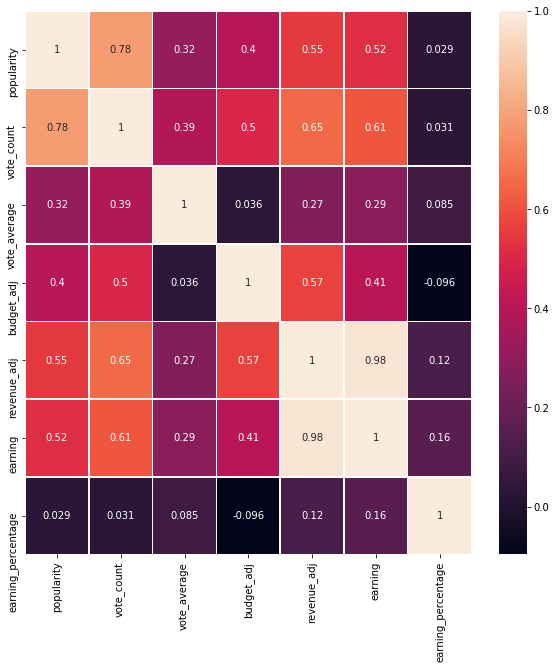

In [58]:
import seaborn as sn
fig, ax = plt.subplots(figsize=(10,10)) 
sn.heatmap(corr_Matrix, linewidths=.5, annot=True, ax=ax)
#Way around to offset top and bottom row 
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t)
plt.show()

This plot shows a summary of correlation between different parameters quickly

# 5) Does more budget affect earning?

If i am a producer, should i use more budget to get higher earning. I want this information from available data

In [59]:
print (correlation(imdb2['budget_adj'],imdb2['earning']))

0.405113573062201


Earnings are positively affected on budget of movie. As a producer, i shouldn't compromise with budget if i want a good earning. Value is matching with corr_matrix as well.

# 6) Which genres has the highest earnings?

In [60]:
#Genre has nothing to do with budget and revenue. 
#For genre information, I am considering complete dataframe imdb (and not imdb1)
imdb_genres=imdb['genres'].unique()

In [61]:
type(imdb_genres)

numpy.ndarray

In [62]:
imdb_genres

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Adventure|Drama|Action|Family|Foreign',
       'Comedy|Family|Mystery|Romance',
       'Mystery|Science Fiction|Thriller|Drama'], dtype=object)

In [63]:
len(imdb_genres)

2040

There are 2040 unique genres in 10866 data. Close observation shows that many are repeated with one or few changes. I will split some genres with '|' and do some study on genres.

In [64]:
type(imdb['genres'])

pandas.core.series.Series

In [65]:
imdb['genres_split']=imdb['genres'].str.split(pat = "|")

In [66]:
imdb

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_split
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]"
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]"
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]"
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,"[Action, Adventure, Science Fiction, Fantasy]"
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,"[Action, Crime, Thriller]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00,[Documentary]
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00,"[Action, Adventure, Drama]"
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00,"[Mystery, Comedy]"
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00,"[Action, Comedy]"


In [67]:
imdb_gen=imdb['genres']#.str.split(pat=",")

In [68]:
#Splitting genre information
imdb_gen=imdb_gen.str.split(pat = "|",expand=True)

In [69]:
len(imdb_gen[0].unique())

21

In [70]:
imdb_gen

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None
2,Adventure,Science Fiction,Thriller,None,None
3,Action,Adventure,Science Fiction,Fantasy,None
4,Action,Crime,Thriller,None,None
...,...,...,...,...,...
10861,Documentary,None,None,None,None
10862,Action,Adventure,Drama,None,None
10863,Mystery,Comedy,None,None,None
10864,Action,Comedy,None,None,None


In [71]:
imdb_gen[0]#.append(imdb_gen[1])

0             Action
1             Action
2          Adventure
3             Action
4             Action
            ...     
10861    Documentary
10862         Action
10863        Mystery
10864         Action
10865         Horror
Name: 0, Length: 10866, dtype: object

In [72]:
#Appending all genres to get unique values
imdb_gen_comb=imdb_gen[0].append(imdb_gen[1],ignore_index=True).append(imdb_gen[2],ignore_index=True).append(imdb_gen[4],ignore_index=True)

In [73]:
#Get unique genre
print (imdb_gen_comb.unique())
len(imdb_gen_comb.unique())

['Action' 'Adventure' 'Western' 'Science Fiction' 'Drama' 'Family'
 'Comedy' 'Crime' 'Romance' 'War' 'Mystery' 'Thriller' 'Fantasy' 'History'
 'Animation' 'Horror' 'Music' 'Documentary' 'TV Movie' nan 'Foreign' None]


22

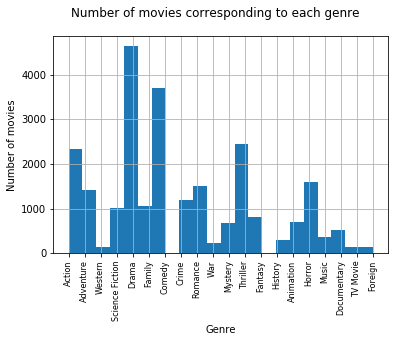

In [81]:
imdb_gen_comb.hist(bins=22,xlabelsize=8,xrot=90)#, ylabel='Frequency of Genre')
plt.suptitle('Number of movies corresponding to each genre')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

Histogram shows that Drama is the most common

In [82]:
imdb_gen_comb.value_counts()

Drama              4637
Comedy             3712
Thriller           2458
Action             2343
Horror             1601
Romance            1518
Adventure          1409
Crime              1203
Family             1053
Science Fiction    1014
Fantasy             807
Animation           693
Mystery             689
Documentary         517
Music               376
History             295
War                 229
Foreign             151
TV Movie            140
Western             134
dtype: int64

Drama is the most common genres, followed by Comedy, Thriller, Action, Horror. 

In [83]:
imdb_genres2=imdb_gen.rename(columns={0:"genre_1",1:"genre_2",2:"genre_3",3:"genre_4",4:"genre_5"})

In [84]:
#concatenating genre data side by side
imdb_comb=pd.concat([imdb, imdb_genres2], axis=1)

Idea behind the process is to find earning dependency on genre

In [85]:
#Removing zero data from imdb_comb. This is similar to what i did earlier
imdb1_comb=imdb_comb[(imdb_comb['budget']!=0)&(imdb_comb['revenue']!=0)]

In [86]:
imdb1_comb=imdb1_comb.reset_index()
#Using data from earlier dataframe
imdb1_comb['earning']=imdb1['earning']
imdb1_comb['earning_percentage']=imdb1['earning_percentage']

In [87]:
imdb1_comb.head(3)
#All genres are separated

,index,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,...,budget_adj,revenue_adj,genres_split,genre_1,genre_2,genre_3,genre_4,genre_5,earning,earning_percentage
0,0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,...,1.379999e+08,1.392446e+09,"[Action, Adventure, Science Fiction, Thriller]",Action,Adventure,Science Fiction,Thriller,None,1.254446e+09,909.019207
1,1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,...,1.379999e+08,3.481613e+08,"[Action, Adventure, Science Fiction, Thriller]",Action,Adventure,Science Fiction,Thriller,None,2.101614e+08,152.290903
2,2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,...,1.012000e+08,2.716190e+08,"[Adventure, Science Fiction, Thriller]",Adventure,Science Fiction,Thriller,None,None,1.704191e+08,168.398365


In [88]:
imdb1_comb.groupby(['genre_1','genre_2'])['earning'].mean()

genre_1  genre_2  
Action   Adventure    1.389936e+08
         Animation    2.377070e+08
         Comedy       5.939198e+07
         Crime        7.582960e+07
         Drama        7.505552e+07
                          ...     
Western  Adventure    9.354991e+06
         Animation    2.230771e+07
         Drama        1.118130e+08
         History     -6.112628e+07
         Thriller    -6.546480e+06
Name: earning, Length: 171, dtype: float64

Genre of Action+Adventure has a mean earnings of 1.39e+08

In [89]:
genre_des=imdb1_comb.groupby(['genre_1','genre_2'])['earning'].mean()

In [90]:
print (genre_des.idxmax())
print (genre_des.max())

('Comedy', 'Western')
516964986.5673121


From genre_1 and genre_2 data, comedy plus Western has the maximum mean earning of 5.16e+8

In [91]:
#Using complete genre information
genre_des2=imdb1_comb.groupby(['genre_1','genre_2','genre_3','genre_4','genre_5'])['earning'].mean()
print (genre_des2.idxmax())
print (genre_des2.max())

('Crime', 'Drama', 'Mystery', 'Thriller', 'Action')
1551568265.2760665


#Considering all five genres; combination of Crime, Drama, Mystery, Thriller and Action has the maximum mean earning 

In [92]:
genre_des2

genre_1   genre_2    genre_3    genre_4          genre_5        
Action    Adventure  Animation  Family           Fantasy            4.119820e+08
                                                 Science Fiction    6.227564e+08
                                Science Fiction  Thriller           1.873029e+07
                     Comedy     Crime            Drama              1.095025e+08
                                                 Thriller           1.392891e+08
                                                                        ...     
Thriller  Fantasy    Comedy     Family           Mystery            1.093965e+08
War       Crime      Drama      Mystery          Romance           -2.821544e+07
          History    Action     Adventure        Drama              1.419759e+07
Western   Animation  Adventure  Comedy           Family             5.159814e+07
                     Family     Comedy           Music             -6.982708e+06
Name: earning, Length: 209, dtype: float64

# 7) Can we provide a list of the most popular directors based on ratings?

In [109]:
director_revenue=imdb.groupby('director')['vote_average'].mean()
director_revenue.sort_values(ascending=False)

director
Mark Cousins         9.2
Derek Frankowski     8.8
David Mallet         8.7
Curt Morgan          8.5
Saul Swimmer         8.5
                    ... 
Justin Russell       2.2
Lawrence Kasanoff    2.2
James Nguyen         2.1
Brett Kelly          2.0
Harold P. Warren     1.5
Name: vote_average, Length: 5067, dtype: float64

We could find top directors in terms of vote_average. Mark Cousins,Derek Frankowski and David Mallet are top three.

In [114]:
imdb['director'].value_counts()

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
                     ..
Brad J. Silverman     1
Mark A. Walsh         1
Sam Friedlander       1
Daryn Tufts           1
Eddie Murphy          1
Name: director, Length: 5067, dtype: int64

As a director, Woody Allen has the maximum number of movies in the dataset

Conclusion:
For this study, tmdb-movies dataset was selected. Some data of either revenue or budget was zero which prompted me to discard those data for earning calculation or any correlaion. 

Some key insights:

1) To get maximum earnings, producer can focus on combination of these genres - Crime, Drama,Mystery,Thriller, Action

2) Vote_count and Popularity are closly related. Higher the number of votes, higher the popularity of movie

3) Vote_average doesn't necessarily transform to earnings. (Low corelation)

4) Popularity are more likely to tranform to earnings (Decent correlation~0.5)

Limitations: 
1) This is a limited dataset. So, above points are based on the given dataset only.
2) Not all movies of directors are given here. All comments are specific to this dataset only